In [28]:
# This is a Python 2 notebook, but may work in Python 3
%matplotlib inline
import numpy as np
import sympy as sp
sp.init_printing()

from IPython.display import display
import pylab
pylab.rcParams['figure.figsize'] = 10, 8
import matplotlib.pyplot as plt

from __future__ import print_function, division

# Newton's method (minimization)

*Source: J. Nocedal, S. J. Wright, Numerical Optimization, 2nd ed, p. 51*

Line search methods are optimization algorithms that compute a search direction $p_k$, and then decide how far to move along in that direction to minimize $f(x_{k+1})$.

Given an initial position $x_0$, the iteration is given by

$$ x_{k+1} = x_k + \alpha_k p_k, $$

where $\alpha_k$ is a positive step length, and $p_k$ is the search direction.

In the Newton iteration the search direction is given by

$$ p_k^\mathrm{N} = -\nabla^2 f_k^{-1} \nabla f_k. $$

# Newton's method (for finding roots)

*Source: http://en.wikipedia.org/wiki/Newton's_method*

Newton's method for finding roots is an iterative method for finding zeroes of a real-valued function:

$$ x:\ f(x) = 0.$$

In one dimension ($f: \mathbb R \to \mathbb R$) it is very intuitive:

$$ x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)} $$

<img src="img/NewtonIteration_Ani.gif">

For several input variables ($f: \mathbb R^n \to \mathbb R$) we get

$$ \mathbf x_{k+1} = \mathbf x_k - \frac{f(\mathbf x_k)}{|\nabla f(\mathbf x_k)|^2} \nabla f(\mathbf x_k). $$

In the most general case ($\mathbf f: \mathbb R^n \to \mathbb R^m$), we want $\mathbf f(\mathbf x) = \mathbf 0$, that is, a system of $m$ nonlinear equations:

$$\begin{bmatrix} f(x)_1 \\ f(x)_2 \\ \vdots \\ f(x)_m \end{bmatrix}
= \begin{bmatrix} 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix}. $$

This is difficult to solve, so we make a linear approximation of $\mathbf f$ in an area around $\mathbf x$. The approximations for the scalar components of $\mathbf f$ become

$$
  f(x + p)_1 = f(x)_1 + \nabla f(x)_1^T p  \\
  \vdots \\
  f(x + p)_m = f(x)_m + \nabla f(x)_m^T p, $$
  
which can be written in matrix form as

$$
\mathbf f(\mathbf x + \mathbf p) = \mathbf f(\mathbf x) + J_{\mathbf f}(\mathbf x)\mathbf p
$$

where $J_{\mathbf f}(\mathbf x)$ is the Jacobian of $\mathbf f(\mathbf x)$ evaluated at $\mathbf x$,

$$
J_{\mathbf f} = \frac{\mathrm d \mathbf f}{\mathrm d \mathbf x} 
= \begin{bmatrix}
    \frac{\partial \mathbf f}{\partial x_1}
    &
    \cdots
    &
    \frac{\partial \mathbf f}{\partial x_n}
\end{bmatrix}
= \begin{bmatrix}
    \frac{\partial f_1}{\partial x_1} &
    \cdots & \frac{\partial f_1}{\partial x_n} \\
    \vdots & \ddots & \vdots \\
    \frac{\partial f_m}{\partial x_1} &
    \cdots & \frac{\partial f_m}{\partial x_n} \\
\end{bmatrix}.
$$

The equation we need to solve to get our estimated $\mathbf x + \mathbf p$ is then

$$ 
\mathbf f(\mathbf x + \mathbf p) \approx \mathbf 0
\\
\mathbf f(\mathbf x) + J_{\mathbf f}(\mathbf x)\mathbf p = \mathbf 0
\\
J_{\mathbf f}(\mathbf x)\mathbf p = -\mathbf f(\mathbf x),
$$

which gives the iteration

$$
 \mathbf x_{k+1} = \mathbf x_k + \mathbf p_k
 \\
 \mathbf x_{k+1} = \mathbf x_k - J_k^{-1} \mathbf f_k.
$$

In practice it is faster and more efficient to solve the linear system above for $\mathbf p_k$ instead of explicitly calculating the inverse of the Jacobian matrix.

**Oops:** The Jacobian as defined here is only square if $m=n$. The inverse only exists in this case.


The method does not always converge, so in addition to a stopping tolerance, we must use a limit on the number of iterations.

### Nonsquare Jacobian, $ m \neq n $

For nonsquare Jacobian we have two cases:

** n > m, underdetermined system **

For example, with $n=2$, $m=1$.

$$ J_{\mathbf f}(\mathbf x)\mathbf p = -\mathbf f(\mathbf x),$$

$$ \begin{bmatrix}\frac{\partial f}{\partial x_1} & \frac{\partial f}{\partial x_2}\end{bmatrix} 
\begin{bmatrix}p_1\\p_2\end{bmatrix} = -f $$

In this case there are infinite solutions, so we must choose $p_1$ or $p_2$ to get an answer.

** n < m, overdetermined system **

For example, with $n=1$, $m=2$.

$$ J_{\mathbf f}(\mathbf x)\mathbf p = -\mathbf f(\mathbf x),$$

$$ \begin{bmatrix}\frac{\partial f_1}{\partial x} \\ \frac{\partial f_2}{\partial x}\end{bmatrix} 
p = -\begin{bmatrix}f_1 \\ f_2\end{bmatrix}  $$

In this case there are no solutions unless the vectors are linearly dependent, but we can find a least squares estimate by solving

$$ J^T J p = -J^T \mathbf f(x) $$

# Rosenbrock Model Problem

*Source: Olav Møyner, ad_doc.pdf*

The Rosenbrock model problem is a classical optimization test problem that can be solved by Newton's method. We have the objective function

$$ f(x,y) = (a-x)^2 + b(y-x^2)^2, \quad a,b \in \{ x \in \mathbb R: x > 0\}, $$

and we want to obtain a minimum. The global minimum of this function is $(a, a^2)$.

The requirement for a global minimum is that 

$$ \nabla f(x,y) = 0, $$

that is,

$$ \frac{\partial f}{\partial x} = -2(a-x)-4bx(y-x^2) = 0, \quad
   \frac{\partial f}{\partial y} = 2b(y-x^2) = 0. $$
   
We call this the residual function

$$ \mathbf R = \begin{bmatrix}\frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y}\end{bmatrix}, $$

and we wish to find a zero ($\mathbf R = \mathbf 0$) of the residual function using Newton's method.

The Rosenbrock function can also be defined for $ x \in \mathbb R^n $:

$$ f(\mathbf x)  = \sum_{i=1}^{n-1} 100(x_{i+1} - x_i^2)^2 + (x_i - 1)^2 $$

In this case the derivatives are

$$ \frac{\partial f}{\partial x_i} = \begin{cases}
    200(x_{i+1}- x_i^2)(-2x_i) + 2(x_i - 1), & i = 1 \\
    200(x_i - x_{i-1}^2) + 200(x_{i+1}- x_i^2)(-2x_i) + 2(x_i - 1), & 1 < i < n \\
    200(x_i - x_{i-1}^2), & i = n
\end{cases}$$

# Automatic differentiation

*Source: Encyclopedia of Optimization, p. 165, Automatic Differentiation: Point and Interval AD*

Automatic differentiation (abbreviated AD) is a method for evaluating derivatives of algorithmically defined functions (programs). It differs from numerical differentiation in that it is exact in principle (except from floating point roundoff errors). It differs from symbolic differentiation in that only the values of the derivatives are calculated, and not the formulas of the derivatives. [Paraphrased from *Encyclopedia of Optimization*]

Using Object Oriented Programming and operator overloading we can create a type supporting gradient arithmetic using the chain rule. Gradient arithmetic works on ordered pairs $(u, ∇u)$ of scalars and vectors. Some operations using gradient arithmetic are:

$$ (u, \nabla u) \pm (v, \nabla v) = (u \pm v,\ \nabla u \pm \nabla v), $$

$$ (u, \nabla u) (v, \nabla v) = (uv,\ u\nabla v + v\nabla u), $$

$$ \frac{(u, \nabla u)}{(v, \nabla v)} = \left(\frac uv,\ \frac{v\nabla u - u \nabla v}{v^2}\right).$$

Similarly, we can create a Hessian arithmetic that works on ordered triples $(u, ∇u, ∇^2 u)$, but this is not needed for Newton's method, and the rules get complicated fast.

$$(u, ∇u, ∇^2 u) (v, ∇v, ∇^2 v) = (uv,\ u\nabla v + v\nabla u,\ u\nabla^2 v + \nabla u \nabla v^T + \nabla v \nabla u^T + v \nabla^2 u)$$

## Forward mode or reverse mode?

MRST uses forward mode, so let's use forward mode. Forward and reverse mode are different ways of traversing the chain rule.


## Operator overloading or source transformation?

Operator overloading is easiest, so I will concentrate on that.

Source: https://wiki.mcs.anl.gov/autodiff/images/9/92/UtkeSlides.pdf

**Operator overloading**

* Simple implementation
* Reverse mode is inefficient

**Source transformation**

* Complicated implementation
* Especially complicated for reverse mode
* More efficient for reverse mode

## Why use AD?

Source: https://wiki.mcs.anl.gov/autodiff/index.php/AD_short_course_at_USNCCM_Jul/21/2013, Narayanan

* We can find the Jacobians of a large and volatile programs. In this case, updating the Jacobian every time the program is changed is tedious and error prone.

In [29]:
# In Python, it is not possible to overload numpy.sin(x) so that
# it accepts a ValGrad object. We must therefore create our own functions
# to take the sine/cosine etc. of ValGrad objects.
def sin(x):
    """sin(x) wrapper for Sympy, Numpy and ValGrad"""
    try:
        return x.__sin__()
    except AttributeError:
        if isinstance(x, sp.Symbol):
            return sp.sin(x)
        else:
            return np.sin(x)
    
def cos(x):
    """cos(x) wrapper for Sympy, Numpy and ValGrad"""
    try:
        return x.__cos__()
    except AttributeError:
        if isinstance(x, sp.Symbol):
            return sp.cos(x)
        else:
            return np.cos(x)

class ValGrad:
    """
    Implements forward Automatic Differentiation (AD) using gradient arithmetic.
    
    val
    ---
    Value of function evaluated in a point
    Should be scalar.
    
    grad
    ----
    Gradient of function evaluated in a point
    Should be a vector, for example a numpy array.
    """
    def __init__(self, val, grad):
        self.val = val   # u
        self.grad = grad # ∇u
    
    def __str__(self):
        """String to be displayed when object is printed"""
        return "[val: %.3f, grad: %s]" % (self.val, self.grad)
    
    def __repr__(self):
        """String representation of object"""
        return self.__str__()
    
    def __neg__(self):
        # ∇(-u) = -∇u
        return ValGrad(-self.val, -self.grad)
    
    def __add__(self, other):
        # ∇(u + v) = ∇u + ∇v
        if np.isscalar(other):
            # This is a constant, not a ValGrad object
            other = ValGrad(other, 0)
        return ValGrad(self.val + other.val,
                       self.grad + other.grad)
    
    def __radd__(self, other):
        return self.__add__(other)
    
    def __sub__(self, other):
        # ∇(u - v) = ∇u - ∇v
        if np.isscalar(other):
            # This is a constant, not a ValGrad object
            other = ValGrad(other, 0)
        return ValGrad(self.val - other.val,
                       self.grad - other.grad)
    
    def __rsub__(self, other):
        return self.__sub__(other)
    
    def __mul__(self, other):
        # ∇(uv) = u∇v + v∇u
        if np.isscalar(other):
            other = ValGrad(other, 0)
        return ValGrad(self.val * other.val, 
                      self.val * other.grad + other.val * self.grad)
    
    def __rmul__(self, other):
        return self.__mul__(other)
    
    def __div__(self, other):
        # ∇u/∇v = (v∇u - u∇v)/v^2
        return ValGrad(self.val / other.val,
            (other.val * self.grad - self.val * other.grad) / other.val**2)
    
    def __sin__(self):
        # ∇sin(u) = cos(u) * ∇u
        return ValGrad(sin(self.val),
                       cos(self.val) * self.grad)
    
    def __cos__(self):
        # ∇cos(u) = -sin(u) * ∇u
        return ValGrad(cos(self.val),
                       -sin(self.val) * self.grad)
    
    def __pow__(self, other):
        #∇(u**n) = n*u**(n-1) * ∇u    (n constant)
        return ValGrad(self.val**other,
                       other * self.val * (other - 1) * self.grad)
    
    # ∇exp(u) = exp(u) * ∇u
    # ∇log(u) = ∇u/u
    
def test_ValGrad():
    x = ValGrad(5, np.array([1, 0]))
    y = ValGrad(3, np.array([0, 1]))
    
    5-x
    
test_ValGrad()

## AD example: Find the gradient

In [30]:
def f(x, y):
    return (x*y + sin(x) + 4)*(3*y**2 + 6)

x0 = 5
y0 = 1

x = ValGrad(x0, np.array([1, 0]))
y = ValGrad(y0, np.array([0, 1]))

print("The ValGrad class automatically knows the gradient at the point")
z = f(x, y)
print(z)


print("\nThe gradient can also be calculated symbolically and evaluated at the point")
x_, y_ = sp.symbols('x y')
f_ = f(x_, y_)
dfdx = sp.diff(f_, x_)
dfdy = sp.diff(f_, y_)

print("\n", "f: ")
display(f_)

print("\n", "df/dx:")
display(dfdx)
print(dfdx.evalf(subs={x_: x0, y_: y0}))

print("\n", "df/dy:")
display(dfdy)
print(dfdy.evalf(subs={x_: x0, y_: y0}))

#u_sp, v_sp, x_sp = sp.symbols('u v x')
#u_sp = 2*x_sp**2
#v_sp = sp.cos(x_sp)

#print((u_sp * v_sp).subs(x_sp, a).evalf())
#print(sp.Derivative(u_sp * v_sp).subs(x_sp, a).evalf())

The ValGrad class automatically knows the gradient at the point
[val: 72.370, grad: [ 11.553   93.2465]]

The gradient can also be calculated symbolically and evaluated at the point

 f: 



 df/dx:


11.5529596691690

 df/dy:


93.2464543520212


## AD example: Get df/dx from a complicated $f(x)$

For functions defined as algorithms it may be hard to differentiate them by hand. This is no problem when using AD.

In [31]:
def f(x, y):
    # This is really just (x*y + sin(x) + 4)*(3*y**2 + 6) written in
    # an algorithmic form.
    t1 = x*y
    t2 = sin(x)
    t3 = t1 + t2
    t4 = t3 + 4
    t5 = y**2
    t6 = 3*t5
    t7 = t6 + 6
    t8 = t4 * t7
    
    return t8

def Jf(x, y):
    x_ad = ValGrad(x, np.array([1, 0]))
    y_ad = ValGrad(y, np.array([0, 1]))
    return f(x_ad, y_ad).grad

# Numeric derivatve
print(Jf(6, 10))

[ 3353.8121  5659.2351]


# Newton's method for finding roots (1D) (simple method)

The process is repeated as

$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

until a sufficiently accurate value is reached.

-1.5
-1.34782608696
-1.32520039895
-1.324718174
-1.32471795724
-1.32471795724
-1.32471795724


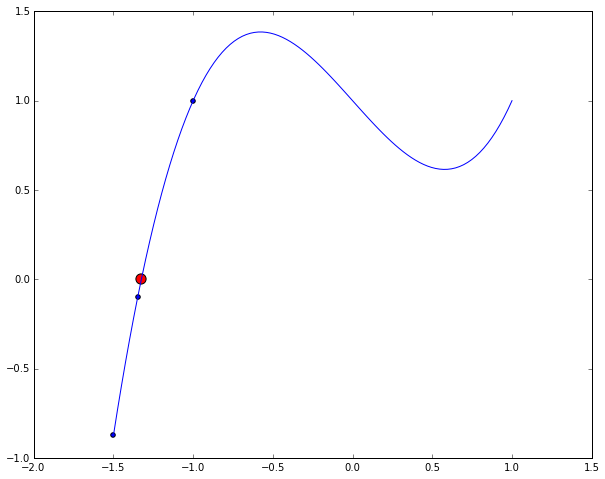

In [32]:
def f(x):
    return x**3 - x + 1

def dfdx(x):
    return 3*x**2 - 1

xx = np.linspace(-1.5, 1, 100)
ff = f(xx)
plt.plot(xx, ff)

# Initial
xk = -1

# Iteration
for i in range(0, 7):
    plt.scatter(xk, f(xk))
    xk = xk - f(xk)/dfdx(xk)
    print(xk)

# Some more stuff
plt.scatter(xk, f(xk), c='red', s=104)


plt.show()

## Newton's method for finding roots, without AD, using simple method ($\mathbb R^n \to \mathbb R$)

That is,

$$ \mathbf x_{k+1} = \mathbf x_k - \frac{f(\mathbf x_k)}{|\nabla f(\mathbf x_k)|^2} \nabla f(\mathbf x_k). $$

pk =  [ 1.      0.9999]
f(xk) =  3.30704583522e-09
0.0


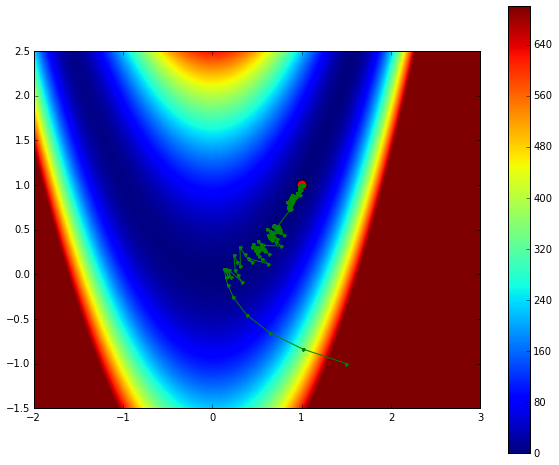

In [33]:
a = 1.0
b = 100.0

def f(x, y):
    #return x**3 - x + 1 # simple cubic
    return (a - x)**2 + b*(y - x**2)**2 # rosenbrock

def grad_f(x, y):
    #return np.array([3*x**2 - 1, 0]) # simple cubic
    return np.array([-2*(a - x) - 4*b*x*(y-x**2),   2*b*(y-x**2)]) # rosenbrock


def plot_f():
    # Plot area
    ds = 0.01
    xmin, xmax = -2.0, 3
    ymin, ymax = -1.5, 2.5
    xx = np.arange(xmin, xmax+ds, ds)
    yy = np.arange(ymin, ymax+ds, ds)
    X, Y = np.meshgrid(xx, yy)
    Z = f(X, Y)

    fig, ax = plt.subplots()
    plt.axis([xmin, xmax, ymin, ymax])
    im = ax.imshow(Z, origin="lower", cmap=plt.cm.jet, vmax=700, extent=[xmin, xmax, ymin, ymax])
    plt.colorbar(im)
    im.set_interpolation('bilinear')


num_dimensions = 2
num_iterations = 1000
p = np.zeros([num_dimensions, num_iterations])
p[:,0] = np.array([1.5, -1.0])

for k in range(0, num_iterations-1):
    pk = p[:,k]
    fk = f(pk[0], pk[1])
    grad_fk = grad_f(pk[0], pk[1])
    p[:,k+1] = pk - fk/np.dot(grad_fk, grad_fk) * grad_fk
    #print(fk)

print("pk = ", pk)
print("f(xk) = ", fk)
print(f(1,1))
plot_f()
plt.plot(p[0,:], p[1,:], 'g.-', mew=1)
plt.scatter(a, a**2, c='red', s=100)
plt.show()

# Newton's method using Jacobian, $\mathbf f: \mathbb R^n \to \mathbb R^n$

In the most general version we have the iteration

$$\mathbf x_{k+1} = \mathbf x_k - J_k^{-1} \mathbf R_k.$$

This converges much faster than the above because the method knows the Hessian of the Rosenbrock function, unlike the above where only the gradient was known.

In [34]:
x, y, a, b = sp.symbols("x y a b")
expr = 2*b*(y-x**2)
sp.diff(expr, y)

norm(Rk)
------
495.682357967
1.00245608414
112.333900608
0.000403476321595
1.82014069927e-05
0.0
0.0
0.0
0.0
---------
pk =  [ 1.  1.]
R(xk) =  [-0.  0.]


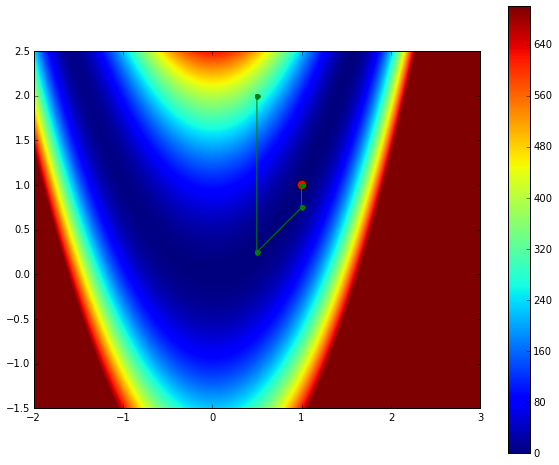

In [41]:
a = 1.0
b = 100.0

# The Rosenbrock test function
def f(x, y):
    return (a - x)**2 + b*(y - x**2)**2 # rosenbrock

# The residual function for the Rosenbrock function.
# The gradient of f in this case.
def R(x, y):
    return np.array([-2*(a - x) - 4*b*x*(y-x**2), 2*b*(y-x**2)])

# The Jacobian of the residual function R
#
# J = | dR1/dx dR1/dy |
#     | dR2/dx dR2/dy |              (matrix, not determinant)
#
def J(x, y):
    return np.array([
        [ 8*b*x**2 - 4*b*(-x**2 + y) + 2,  -4*b*x],
        [-4*b*x,                            2*b  ],
    ])
i,
num_dimensions = 2
num_iterations = 10
p = np.zeros([num_dimensions, num_iterations])
p[:,0] = np.array([0.5, 2.0])


print("norm(Rk)\n------")
for k in range(0, num_iterations-1):
    pk = p[:,k]
    Rk = R(pk[0], pk[1])
    Jk = J(pk[0], pk[1])
    p[:,k+1] = pk - np.linalg.solve(Jk, Rk)
    #p[:,k+1] = pk - fk/np.dot(grad_fk, grad_fk) * grad_fk
    print(np.linalg.norm(Rk))

print("---------")
print("pk = ", pk)
print("R(xk) = ", Rk)
plot_f()
plt.plot(p[0,:], p[1,:], 'g.-', mew=3)
plt.scatter(a, a**2, c='red', s=100)
plt.show()

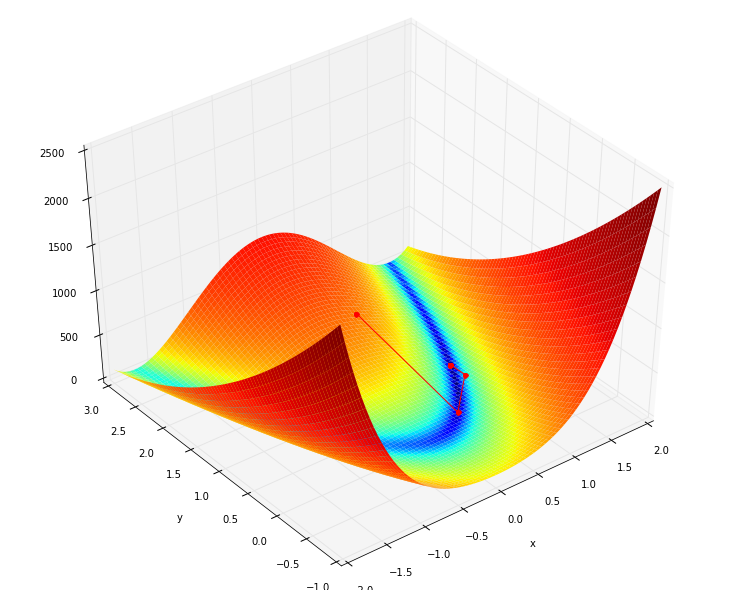

In [44]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = Axes3D(fig, azim = -128, elev = 43)
s = .05
X = np.arange(-2, 2.+s, s)
Y = np.arange(-1, 3.+s, s)
X, Y = np.meshgrid(X, Y)
Z = (1.-X)**2 + 100.*(Y-X*X)**2
# ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, norm = LogNorm(), cmap = cm.jet)
# Without using `` linewidth=0, edgecolor='none' '', the code may produce a graph with wide black edges, which 
# will make the surface look much darker than the one illustrated in the figure above.
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, norm = LogNorm(), cmap = cm.jet, linewidth=0, edgecolor='none')

# Set the axis limits so that they are the same as in the figure above.
ax.set_xlim([-2, 2.0])                                                       
ax.set_ylim([-1, 3.0])                                                       
ax.set_zlim([0, 2500]) 

plt.xlabel("x")
plt.ylabel("y")
plt.plot(p[0,:], p[1,:], f(p[0,:], p[1,:]), 'r.-', mew=3)

plt.savefig("Rosenbrock function.eps")

plt.show()

# AD for multi-dimensional input and output: $ f: \mathbb R^n \to \mathbb R^m $

In this case we not only have to worry about the derivative of the function value at every point, but all the derivatives for every value.

Input and output are column vectors of length $n$ and $m$ respectively.

$$ 
x = \begin{bmatrix}x_1\\ x_2\\ \vdots \\ x_n\end{bmatrix}, 
\qquad
f(x) = y = \begin{bmatrix}y_1\\ x_y\\ \vdots \\ y_m\end{bmatrix} 
$$

We define the Jacobian as an $m\times n$ matrix.

$$
J = \frac{\mathrm d \mathbf f}{\mathrm d \mathbf x} 
= \begin{bmatrix}
    \frac{\partial \mathbf f}{\partial x_1}
    &
    \cdots
    &
    \frac{\partial \mathbf f}{\partial x_n}
\end{bmatrix}
= \begin{bmatrix}
    \frac{\partial f_1}{\partial x_1} &
    \cdots & \frac{\partial f_1}{\partial x_n} \\
    \vdots & \ddots & \vdots \\
    \frac{\partial f_m}{\partial x_1} &
    \cdots & \frac{\partial f_m}{\partial x_n} \\
\end{bmatrix}
$$

Ideally the implementation should be the same as above.

# Algorithmic differentiation in Python with AlgoPy

Source: http://www.sciencedirect.com/science/article/pii/S1877750311001013



# The chain rule for multivariable functions

*Source: https://www-old.math.gatech.edu/academic/courses/core/math2601/pdf/jacobian.pdf* [1]

For scalar functions $f(y), g(x)$ the chain rule is 

$$\frac{\mathrm d}{\mathrm dx} f(g(x)) = f'(g(x)) * g'(x). $$

The chain rule also exists for two vector-valued functions:

$\mathbf f:\ \mathbb R^m \to \mathbb R^k$ with Jacobian $J_{\mathbf f}$ with dimensions $k \times n$

$\mathbf g:\ \mathbb R^n \to \mathbb R^m$ with Jacobian $J_{\mathbf g}$ with dimensions $m \times n.$

Let $x \in \mathbb R^n$. Then $\mathbf f(\mathbf g(\mathbf x))$ is valid function, since the input/output dimensions match. Then the Jacobian is

$$ J_{\mathbf f \circ \mathbf g}(\mathbf x) =  J_{\mathbf f}(\mathbf g(\mathbf x)) J_{\mathbf g}(x)$$

---

**Example** (Source: [1])

$$ f(u, v, w) = \begin{bmatrix}u^2 w + v^2 \\ uvw + u -w\end{bmatrix} $$

$$ g(x, y, z) = \begin{bmatrix}x - yz \\ x^2y - z \\ xy^3 + z\end{bmatrix} $$

Find the Jacobian of $f(g(x, y, z))$ with respect to $(x, y, z)^T$.

**Example solution**

$$ J_f = \begin{bmatrix}
\frac{\partial f_1}{\partial u} & \frac{\partial f_1}{\partial v} & \frac{\partial f_1}{\partial w} \\
\frac{\partial f_2}{\partial u} & \frac{\partial f_2}{\partial v} & \frac{\partial f_2}{\partial w} \\
\end{bmatrix}
= \begin{bmatrix}
2uw    & 2v  &  u^2   \\
vw + 1 & uw  &  uv -1
\end{bmatrix} $$

$$ J_g = \begin{bmatrix}
\frac{\partial g_1}{\partial x} & \frac{\partial g_1}{\partial y} & \frac{\partial g_1}{\partial z} \\
\frac{\partial g_2}{\partial x} & \frac{\partial g_2}{\partial y} & \frac{\partial g_2}{\partial z} \\
\frac{\partial g_3}{\partial x} & \frac{\partial g_3}{\partial y} & \frac{\partial g_3}{\partial z}
\end{bmatrix}
= \begin{bmatrix}
1    &  -z     & -y \\
2xy  & x^2     & -1 \\
y^3  &  3xy^2  & 1
\end{bmatrix} $$

$$ J_{f\circ g} = J_f J_g = \begin{bmatrix}
2uw    & 2v  &  u^2   \\
vw + 1 & uw  &  uv -1
\end{bmatrix}
\begin{bmatrix}
1    &  -z     & -y \\
2xy  & x^2     & -1 \\
y^3  &  3xy^2  & 1
\end{bmatrix}$$

The matrix is too wide to display properly
df1/dx, df2/dx


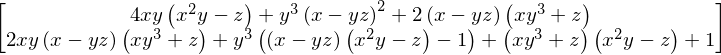

df1/dy, df2/dy


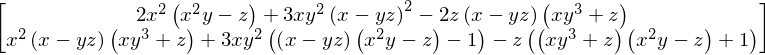

df1/dz, df2/dz


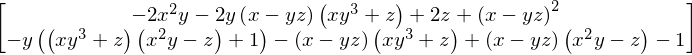

In [10]:
x, y, z, u, v, w = sp.symbols("x y z u v w")
Jf = sp.Matrix([
    [2*u*w,    2*v,  u**2 ],
    [v*w + 1,  u*w,  u*v-1]
])
Jg = sp.Matrix([
    [1,      -z,       -y],
    [2*x*y,  x**2,     -1],
    [y**3,   3*x*y**2,  1]
])
Jfog = (Jf*Jg).subs(u, x - y*z).subs(v, x**2 * y - z).subs(w, x*y**3 + z)

# The matrix is too wide to print
print("The matrix is too wide to display properly")
print("df1/dx, df2/dx")
display(Jfog[:,0])
print("df1/dy, df2/dy")
display(Jfog[:,1])
print("df1/dz, df2/dz")
display(Jfog[:,2])

Say we wanted to find $\frac{\mathrm d f_2}{\mathrm d x}$ we can now look this up in the Jacobian matrix and find

$$ 2xy(x−yz)(xy^3+z)+y^3((x−yz)(x^2y−z)−1)+(xy^3+z)(x^2y−z)+1 $$

We can confirm that this is correct by using the ordinary way to find the derivative.

$$ \frac{\mathrm df_2}{\mathrm dx} = \frac{\partial f_2}{\partial u}\frac{\partial u}{\partial x} + \frac{\partial f_2}{\partial v}\frac{\partial v}{\partial x} + \frac{\partial f_2}{\partial w}\frac{\partial w}{\partial x} $$

In [11]:
df2dx = Jfog[1,0]
((x**2 * y - z)*(x*y**3 + z) + 1)*1 + (x-y*z)*(x*y**3 + z)*2*x*y + ((x-y*z)*(x**2*y-z)-1)*y**3 - df2dx
# The difference is zero, so they are equal

---

# Forward automatic differentiation implementation using operator overloading

A basic AD class can be created with only two member variables:

* The **vector value in the point**

* The **Jacobian at the point**

The basic usage pattern for such a class is like this:

First, create a `ValJac` object of some coordinate, with Jacobian equal to an identity matrix.

    x = ValJac([1; 2], [1 0; 0 1])
    
Then evaluate the function we want to find the Jacobian of, with **x** as the parameter.

    y = f(x)

We assume $f(x)$ is a function composed of primitives, like matrix/vector addition/multiplication, and some elementwise operations. Since **x** has its operators overloaded, the return value of $f(x)$ will also most likely be **ValJac** object. (The exception being e.g. $f(x) = 0$. ValJac can never "spread" to the return value.)

    y.val
    y.jac
    
We now have the value of the Jacbian in the point specified, without ever differentiating $f(x)$ manually. The error is only due to floating point numbers, and not due to discretization errors.

This simple method is not very efficient, since no results are cached, and object creation is expensive in a language like Python.

## Operations that must be overloaded

Page 338 of the AlgoPy paper lists some more operations like Cholesky decomposition, but to simplify development I will prioritize simple operations. In all these operations, let $(\mathbf u, J_{\mathbf u})$ be a `ValJac` object with value $\mathbf u$ and Jacobian $J_{\mathbf u}$.

---
**Multiplication with scalar**

$ 2(\mathbf u, J_{\mathbf u}) = (2\mathbf u, 2J_{\mathbf u})$

In this operation, we simply multiply both the value and the Jacobian by a scalar.

---
**Get vector element**

When retrieving an element of $u(x)$, like $u_1(x)$, what should should be done?

$ (\mathbf u, J_{\mathbf u}) = \left(\begin{bmatrix}u_1 \\ u_2 \\ u_3\end{bmatrix}, \begin{bmatrix}\nabla u_1^T\\ \nabla u_2^T\\ \nabla u_3^T \end{bmatrix}\right) $

It is clear that this we must have

$ (\mathbf u, J_{\mathbf u})_1 = (u_1, \nabla u_1^T), $

which can be implemented like:
       
    u = ValJac(np.matrix("1; 2; 3"), np.matrix("1 2 3; 4 5 6; 7 8 9"))
    assert u[0].val == np.matrix("1")
    assert u[0].jac == np.matrix("1 2 3")

---
**Vector addition and subtraction**

$(\mathbf u, J_{\mathbf u}) \pm (\mathbf v, J_{\mathbf v}) = 
(\mathbf u + \mathbf v, J_{\mathbf u} + J_{\mathbf v})$

---
**Left multiplication with constant row vector (dot product)**

This is element retrieval combined with scalar multiplication, and vector addition.

$\begin{bmatrix}2 & 4 & 6\end{bmatrix} (\mathbf u, J_{\mathbf u}) = 2(\mathbf u, J_{\mathbf u})_1 + 4(\mathbf u, J_{\mathbf u})_2 + 6(\mathbf u, J_{\mathbf u})_3$

---
**Transpose**

How should we define $(\mathbf u, J_{\mathbf u})^T?$ I argue that it is equal to $(\mathbf u^T, J_{\mathbf u}^T)$.

$\mathbf u = \begin{bmatrix}u_1 \\ u_2\end{bmatrix},
\quad J_{\mathbf u} = \begin{bmatrix}\nabla u_1^T \\ \nabla u_2^T\end{bmatrix}
$, where $u_1$, $u_2$ are scalar.

Let $\mathbf v$ = $\mathbf u^T$. We get

$\mathbf v = \begin{bmatrix}\mathbf v_1\end{bmatrix} = \begin{bmatrix}u_1 & u_2\end{bmatrix} $

$ J_{\mathbf v} = \begin{bmatrix}\nabla \mathbf v_1^T\end{bmatrix} $

$ \nabla \mathbf v_1 = \begin{bmatrix}
\frac{\partial \mathbf v_1}{\partial x_1} \\
\frac{\partial \mathbf v_1}{\partial x_2} \\
\frac{\partial \mathbf v_1}{\partial x_3}
\end{bmatrix} =
\begin{bmatrix}
\frac{\partial u_1}{\partial x_1} & \frac{\partial u_2}{\partial x_1} \\
\frac{\partial u_1}{\partial x_2} & \frac{\partial u_2}{\partial x_2} \\
\frac{\partial u_1}{\partial x_3} & \frac{\partial u_2}{\partial x_3}
\end{bmatrix} = 
\begin{bmatrix}
\nabla u_1 & \nabla u_2
\end{bmatrix} =
J_{\mathbf u}^T $

Thus

$J_{\mathbf u^T} = J_{\mathbf u}^T$.

---
**Multiplication**

For single dimensional variables we get $ (a, \nabla a) (b, \nabla b) = (ab,\ a\nabla b + b\nabla a). $
 
---
**Combine/stack vectors**

Now that we can extract elements of a vector, we also need to combine them again, so that a function like this can be evaluated with an AD object as input.

$ f(x) = \begin{bmatrix}x_3 \\ x_2\end{bmatrix}, \quad f((\mathbf x, J_{\mathbf x}))$

To combine them again we need to use a Numpy function since there is no operator to overload.

    >>> x = np.matrix("1; 2; 3")
    >>> np.vstack([x[2], x[1]])
    matrix([[3],
            [2])
            
This means that our class must implement the **vstack** function for AD objects. In code, the `vstack` function will be used, but I will use bracket notation here.

$
\begin{bmatrix}(\mathbf u, J_{\mathbf u}) \\ (\mathbf v, J_{\mathbf v})
\end{bmatrix} = (
\begin{bmatrix}
    \mathbf u \\ \mathbf v
\end{bmatrix}, 
\begin{bmatrix}
    J_{\mathbf u} \\ J_{\mathbf v}
\end{bmatrix})
$

...

## Alternate way to support numpy matrices and vectors.

In numpy, it is possible to create matrices of custom datatypes. We can let this custom datatype be an AD object.

## AlgoPy

Source: https://pythonhosted.org/algopy/getting_started.html

Consider the situation where 

$$A(x) = \begin{bmatrix}
    \sin(x_1)^2 + x_2 & x_1 \\
    e^{x_1/x_2}       & x_3 \\
    \log(x_1 + x_3 x_2) & 0
\end{bmatrix} $$

In a second step it is desired to compute

$$ \Phi(x) = \max(\lambda[(A(x)^T A(x))^{-1}]),$$

where $ \lambda(C) $ computes all the eigenvalues of the matrix $C$.

We are interested in the numerical value of the gradient 

$$ \nabla_x \Phi(x) $$

at $x = (3,5,7)^T$. Let's look at the forward mode of AD to compute $\frac{\partial \Phi}{\partial x_1}$.

In [12]:
import numpy as np
from algopy import UTPM, eigh, inv, dot

# number of dimensions = 2
# P = 2 ????
# matrix height = 3
# matrix width = 1
x = UTPM(np.zeros((2,1,3)))
x.data[0,0] = [3,5,7] # value in the point
x.data[1,0] = [1,0,0] # derivative direction?

A = UTPM(np.zeros((2,1,3,2)))
A[0,0] = np.sin(x[0])**2 + x[1]
A[0,1] = x[0]
A[1,0] = np.exp(x[0]/x[1])
A[1,1] = x[2]
A[2,0] = np.log(x[0] + x[2]*x[1])
A[2,1] = 0

phi = eigh(inv(dot(A.T, A)))[0][-1]

print('A', A)
print("Phi(x)", phi)
print("Phi value", phi.data[0])
print("Phi derivative", phi.data[1])

# To find the rest of the derivatives we can change x.data[1,0] = [1,0,0]
# to x.data[1,0] = [0,1,0] to find the derivative in the x2 direction.

A [[[[ 5.01991486  3.        ]
   [ 1.8221188   7.        ]
   [ 3.63758616  0.        ]]]


 [[[-0.2794155   1.        ]
   [ 0.36442376  0.        ]
   [ 0.02631579  0.        ]]]]
Phi(x) [[ 0.04784897]
 [ 0.01173805]]
Phi value [ 0.04784897]
Phi derivative [ 0.01173805]


/home/shomea/a/andreros/anaconda/envs/py27/lib/python2.7/site-packages/algopy/utpm/algorithms.py:476: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if out == None:
/home/shomea/a/andreros/anaconda/envs/py27/lib/python2.7/site-packages/algopy/utpm/algorithms.py:382: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if out == None:
/home/shomea/a/andreros/anaconda/envs/py27/lib/python2.7/site-packages/algopy/utpm/algorithms.py:811: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if out == None:
/home/shomea/a/andreros/anaconda/envs/py27/lib/python2.7/site-packages/algopy/utpm/algorithms.py:1177: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if out == None:


In [13]:
# Rosenbrock test with AlgoPy

from algopy import UTPM, zeros

a = 1.0
b = 100.0

# The Rosenbrock test function
def f(x):
    y = (a - x[0])**2 + b*(x[1] - x[0]**2)**2
    return y

# The residual function for the Rosenbrock function.
# The gradient of f in this case.
def R(x):
    y = zeros(2, dtype=x)
    y[0] = -2*(a - x[0]) - 4*b*x[0]*(x[1]-x[0]**2)
    y[1] = 2*b*(x[1]-x[0]**2)
    return y

# The Jacobian of the residual function R. This is the actually the Hessian of f.
#
# J = | dR1/dx dR1/dy |
#     | dR2/dx dR2/dy |              (matrix, not determinant)
#
def J(x):
    y = zeros((2,2), dtype=x)
    y[0,0] = 8*b*x[0]**2 - 4*b*(-x[0]**2 + x[1]) + 2
    y[0,1] = -4*b*x[0]
    y[1,0] = -4*b*x[0]
    y[1,1] = 2*b
    return y

def J_algopy(x0):
    x = UTPM.init_hessian(x0)
    y = f(x)
    return UTPM.extract_hessian(2, y)
    
print(J_algopy((1.,2.)))

print(J((1.,2.)))

[[ 402. -400.]
 [-400.  200.]]
[[402.0 -400.0]
 [-400.0 200.0]]


## AlgoPy: First Order Derivatives in the Forward Mode of Algorithmic Differentiation

Source: https://pythonhosted.org/algopy/examples/first_order_forward.html

In this example we extract derivatives from the computed univariate Taylor polynomials (UTP).

The basic observation is that by use of the chain rule we obtain, for functions $F: \mathbb R^N \to \mathbb R^M$, we obtain the derivative in the $x_1$ direction by the following expression:

$$ \frac{\mathrm d F}{\mathrm dx_1}\bigg|_{x=x_0} = \frac{\mathrm d}{\mathrm dt} F(x_0 + x_1 t)\bigg|_{t=0} = 
\frac{\mathrm d}{\mathrm dx} F(x)\bigg\rvert_{x=x_0}\cdot x_1 $$

Where $\frac{\mathrm dF}{\mathrm dx}$ is the Jacobian. This is thus a Jacobian-vector product. In this example we want to compute the first column of the Jacobian of the function

$$ F(x) = \begin{bmatrix}x_0 x_1 \\ x_1 x_2 \\ x_2 x_0\end{bmatrix} $$

The result should be

$$ J(x) = \begin{bmatrix}
x_1 & x_0 & 0 \\
0   & x_2 & x_1 \\
x_2 & 0   & x_0
\end{bmatrix} $$

In [14]:
import numpy as np
from algopy import UTPM, zeros

def F(x):
    y = zeros(3, dtype=x)
    y[0] = x[0] * x[1]
    y[1] = x[1] * x[2]
    y[2] = x[2] * x[0]
    return y

def J(x):
    y = zeros((3,3), dtype=x)
    y[0,0], y[0,1], y[0,2] = x[1], x[0], 0
    y[1,0], y[1,1], y[1,2] = 0,    x[2], x[1]
    y[2,0], y[2,1], y[2,2] = x[2], 0, x[0]
    return y

x0 = np.array([1,3,5], dtype=float) # position where the derivative is found
x1 = np.array([1,0,0], dtype=float) # derivative direction

D = 2 # Zeroeth and first order Taylor derivatives
P = 1 # ???
N = 3 # Length of x
x = UTPM(np.zeros((D,P,N)))

# The first coordinate axis for x.data chooses between the order of the Taylor coefficients.
# x.data[0,:,:] = The value in the point (0th order coefficients)
# x.data[1,:,:] = The derivative in the point (1th order coefficients)
# x.data[2,:,:] = The 2nd derivative in the point (2nd order coefficients). Does not exist in this case.
x.data[0,0,:] = x0
x.data[1,0,:] = x1

# Normal function evaluation
y0 = F(x0)
J0 = J(x0)
print("y0", y0)
print("J0\n", J0)

# UTP function evaluation
# We see that the first submatrix is the value in the point,
# and the second submatrix is the derivative in the x1-direction.
y = F(x)
print("y:", y)


y0 [  3.  15.   5.]
J0
 [[ 3.  1.  0.]
 [ 0.  5.  3.]
 [ 5.  0.  1.]]
y: [[[  3.  15.   5.]]

 [[  3.   0.   5.]]]


**Example 2: Using linear algebra functions**

Consider the function

$$ A(x) = \begin{bmatrix}
\log(x_0 x_1) & \log(x_1) + e^{x_0} \\
\sin^2 x_0 + |\cos x_0|^{3.1} & x_0^{\cos x_1}
\end{bmatrix} $$

$$ f(x) = \log(x^T A(x)^{-1}x) $$

We want to approximate the change of $f(x)$ from $x_0 = \begin{bmatrix}3 \\ 5\end{bmatrix}$ to $x_0 + \begin{bmatrix}7 \\ 11\end{bmatrix}$, that is,

$$ \nabla_x f\left(\begin{bmatrix}3\\5\end{bmatrix}\right) \cdot \begin{bmatrix}7 \\ 11\end{bmatrix} $$

In [15]:
import numpy as np
from algopy import UTPM, dot, inv, zeros

def f(x):
    A = zeros((2,2), dtype=x)
    A[0,0] = np.log(x[0]*x[1])
    A[0,1] = np.log(x[1]) + np.exp(x[0])
    A[1,0] = np.sin(x[0])**2 + np.abs(np.cos(x[0]))**3.1
    A[1,1] = x[0]**np.cos(x[1])
    return np.log( dot(x.T, dot(inv(A), x)))
    
x = np.array([3., 7.])
x = UTPM.init_jacobian(x)

y = f(x)

print("normal function evaluation f(x) = ", y.data[0,0])
print("Jacobian df/dx = ", UTPM.extract_jacobian(y))
print("Equivalently:    ", y.data[1])

normal function evaluation f(x) =  3.05202302279
Jacobian df/dx =  [ 0.36417101 -0.20787347]
Equivalently:     [ 0.36417101 -0.20787347]


## Newton's method for the Rosenbrock test function using AlgoPy AD

norm(Rk) during iterations
------
1651.1826065
1.99998174565
444.323316308
0.00246585465308
0.000679805254127
5.77315972805e-15
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-----Final values of x and R----
pk =  [ 1.  1.]
R(xk) =  [ 0.  0.]
Actual minimum is at (1.0, 1.0)


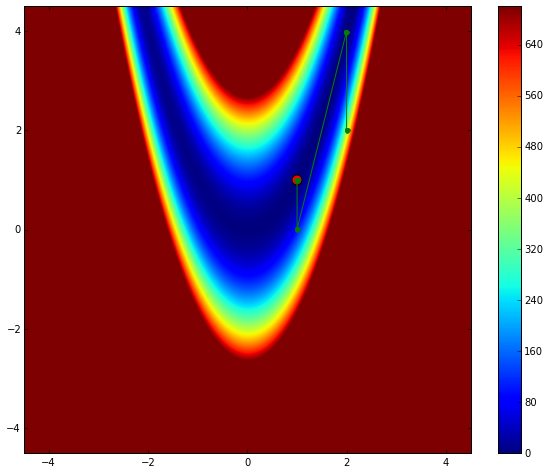

In [16]:
# Rosenbrock test with AlgoPy

from algopy import UTPM, zeros

a = 1.0
b = 100.0

# The Rosenbrock test function
def f(x):
    y = (a - x[0])**2 + b*(x[1] - x[0]**2)**2
    return y
xstar = (a, a**2) # minimum (red dot on the plot)
x0 = (2, 2) # starting coordinates


def plot_f():
    # Plot area
    ds = 0.01
    xmin, xmax = -4.5, 4.5
    ymin, ymax = -4.5, 4.5
    xx = np.arange(xmin, xmax+ds, ds)
    yy = np.arange(ymin, ymax+ds, ds)
    X, Y = np.meshgrid(xx, yy)
    Z = f([X, Y])

    fig, ax = plt.subplots()
    plt.axis([xmin, xmax, ymin, ymax])
    im = ax.imshow(Z, origin="lower", cmap=plt.cm.jet, vmax=700, extent=[xmin, xmax, ymin, ymax])
    plt.colorbar(im)
    im.set_interpolation('bilinear')

# The residual function for the Rosenbrock function.
# The gradient of f in this case.
# This was derived by hand
def R(x):
    y = zeros(2, dtype=x)
    y[0] = -2*(a - x[0]) - 4*b*x[0]*(x[1]-x[0]**2)
    y[1] = 2*b*(x[1]-x[0]**2)
    return y

# The Jacobian of the residual function R of the Rosenbrock function. 
# This is the actually the Hessian of f.
#
# J = | dR1/dx dR1/dy |
#     | dR2/dx dR2/dy |              (matrix, not determinant)
#
# This was derived by hand
def J(x):
    y = zeros((2,2), dtype=x)
    y[0,0] = 8*b*x[0]**2 - 4*b*(-x[0]**2 + x[1]) + 2
    y[0,1] = -4*b*x[0]
    y[1,0] = -4*b*x[0]
    y[1,1] = 2*b
    return y

# Automatically derived residual function
def R_algopy(x0):
    x = UTPM.init_jacobian(x0)
    y = f(x)
    return UTPM.extract_jacobian(y)

# Automatically derived Jacobian of the residual function
def J_algopy(x0):
    x = UTPM.init_hessian(x0)
    y = f(x)
    return UTPM.extract_hessian(2, y) # 2 is the length of the x-vector

num_dimensions = 2
num_iterations = 20
p = np.zeros([num_dimensions, num_iterations])
p[:,0] = np.array(x0) # Starting coordinates


print("norm(Rk) during iterations\n------")
for k in range(0, num_iterations-1):
    pk = p[:,k]
    Rk = R_algopy(pk)
    Jk = J_algopy(pk)
    p[:,k+1] = pk - np.linalg.solve(Jk, Rk)
    print(np.linalg.norm(Rk))

print("-----Final values of x and R----")
print("pk = ", pk)
print("R(xk) = ", Rk)
plot_f()
plt.plot(p[0,:], p[1,:], 'g.-', mew=3)
print("Actual minimum is at", xstar)

# Draw the actual minimum of the test function
plt.scatter(xstar[0], xstar[1], c='red', s=100)

plt.show()

## Newton's method for the Rosenbrock test function using AD

To learn more about AD I have built the following class:

In [17]:
# %load adclass/valjac.py
from __future__ import division
from exceptions import NotImplementedError

import numpy as np
import sympy as sp


def vstack(l):
    """
    Stack vectors vertically.

    Case 1: No objects are Valjac objects. Simply stack them with Numpy.

    Case 2: Some objects are Valjac objects. In this case the non-ValJac-objects
    are given a zero-jacobian with appropriate dimension.
    """
    # The easy part, the values
    val = np.vstack((obj.val if hasattr(obj, 'val') else obj for obj in l))

    # Ensure the values have the same amount if derivatives
    ns = [obj.jac.shape[1] for obj in l if isinstance(obj, ValJac)]
    if ns:
        assert all(n == ns[0] for n in ns)
        n = ns[0]
    else:
        # No ValJac objects. Simply return the stacked values.
        return val

    def jac_generator(l, n):
        """
        Returns the Jacobian if it exists.
        Otherwise creates a zero Jacobian with appropriate dimensions.
        """
        for obj in l:
            if isinstance(obj, ValJac):
                yield obj.jac
            elif np.isscalar(obj):
                yield np.zeros([1, n])
            else:
                assert obj.shape[0] >= 1
                print(obj.shape[0])
                yield np.zeros([obj.shape[0], n])

    jac = np.vstack(jac_generator(l, n))
    return ValJac(val, jac)

class ValJac:
    """
    Implements forward Automatic Differentiation (AD) using gradient
    arithmetic.

    val
    ---
    Value of function evaluated in a point
    Should be a numpy column matrix of length n.

    jac
    ----
    Jacobian of function evaluated in a point
    Should be a m × n numpy matrix.
    """
    def __init__(self, val, jac):
        # We restrict ourselves to matrices for easier code.
        assert isinstance(val, np.matrix)
        assert isinstance(jac, np.matrix)

        # Check that val is a column vector, and that the Jacobian has a
        # matching shape
        assert val.shape[1] == 1
        assert jac.shape[0] == val.shape[0]

        self.val = val
        self.jac = jac

    def __str__(self):
        """String to be displayed when object is printed"""
        return "(val: %s, jac:\n%s)" % (self.val, self.jac)

    def __repr__(self):
        """String representation of object"""
        return self.__str__()

    def __eq__(self, other):
        """
        Element-wise comparison of value equality.

        Returns a matrix of True/False values.
        """
        try:
            # ValJac object
            return self.val == other.val
        except AttributeError:
            return self.val == other

    def __len__(self):
        """Returns the length of the value vector"""
        return len(self.val)

    def __getitem__(self, i):
        """Returns the value and gradient for some indeval"""
        return ValJac(self.val[i,:], self.jac[i,:])

    def __neg__(self):
        # J(-u) = -Ju
        return ValJac(-self.val, -self.jac)

    def __mul__(self, other):

        # Ordinary single-variable multiplication
        if isinstance(other, ValJac):
            assert self.val.shape[0]  == 1 and self.val.shape[1]  == 1
            assert other.val.shape[0] == 1 and other.val.shape[1] == 1
            return ValJac(self.val * other.val,
                          self.val * other.jac + other.val * self.jac)

        # Scalar multiplication
        if np.isscalar(other):
            return ValJac(other*self.val, other*self.jac)

        # Left multiplication with constant row vector (dot product)
        # [2 4 6](u, Ju) = 2(u, Ju)[0] + 4(u, Ju)[1] + 6(u, Ju)[2]
        if isinstance(other, np.matrix):
            assert other.shape[0] == 1
            assert other.shape[1] == self.val.shape[0]
            ret = 0
            for i in range(0, other.shape[1]):
                ret += other[0,i] * self[i]
            return ret

        raise NotImplementedError

    def __rmul__(self, other):
        return self.__mul__(other)

    def __add__(self, other):
        """
        Adds values and jacobians of two objects.

        If one value is scalar, elementwise addition is performed.
        If one object is constant, its Jacobian is assumed to be zero.

        Oops: Put the ValJac object to the left when performing operations with
        other objects. Numpy tries to be smart when performing addition between
        Numpy classes and objects of other classes, causing weird behavior.

        x = ValJac(...)
        y = np.matrix(...)

        x + y # correct
        y + x # incorrect
        """
        # J(u + v) = Ju + Jv
        if np.isscalar(other):
            # This is a scalar, not a ValJac object
            return ValJac(self.val + other, self.jac)

        if isinstance(other, np.matrix):
            # This is a constant vector, not a Valjac object
            assert np.array_equal(self.val.shape, other.shape)
            return ValJac(self.val + other, self.jac)

        if isinstance(other, ValJac):
            return ValJac(self.val + other.val,
                           self.jac + other.jac)

        raise NotImplementedError("Only ValJac, scalar and np.matrix is allowed")

    def __radd__(self, other):
        raise NotImplementedError("Put ValJac to the left")

    def __sub__(self, other):
        return self.__add__(-other)

    def __rsub__(self, other):
        raise NotImplementedError("Put ValJac to the left")

    def __truediv__(self, other):
        """Divide every element by some scalar, x/5."""
        assert np.isscalar(other), "Only scalar division supported"
        return ValJac(self.val / other,
                      self.jac / other)

    def __rtruediv__(self, other):
        """Divide some scalar with every element, 5/x."""
        assert np.isscalar(other)
        return ValJac(other/self.val, np.multiply(-other/np.square(self.val), self.jac))

    def __div__(self, other):
        raise NotImplementedError("Enable Python 3 division")

    def __rdiv__(self, other):
        raise NotImplementedError("Enable Python 3 division")

    def __sin__(self):
        """Take the sine of every element"""
        raise NotImplementedError
        # Jsin(u) = cos(u) * Ju
        return ValJac(sin(self.val),
                       cos(self.val) * self.jac)

    def __cos__(self):
        """Take the cosine of every element"""
        raise NotImplementedError
        # Jcos(u) = -sin(u) * Ju
        return ValJac(cos(self.val),
                       -sin(self.val) * self.jac)

    def __pow__(self, power):
        """
        Raise the value to some power.
        The value must be square.
        """
        # J(u**n) = n*u**(n-1) * Ju    (n constant)
        if len(self.val) == 1:
            return ValJac(self.val**power,
                          power * self.val**(power - 1) * self.jac)
        else:
            raise NotImplementedError


norm(Rk) during iterations
------
1651.1826065
1.99998174565
444.323316308
0.00246585465434
0.000679805254871
5.77315972805e-15
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-----Final values of x and R----
pk =  [[ 1.]
 [ 1.]]
R(xk) =  [[-0.]
 [ 0.]]
Actual minimum is at (1.0, 1.0)


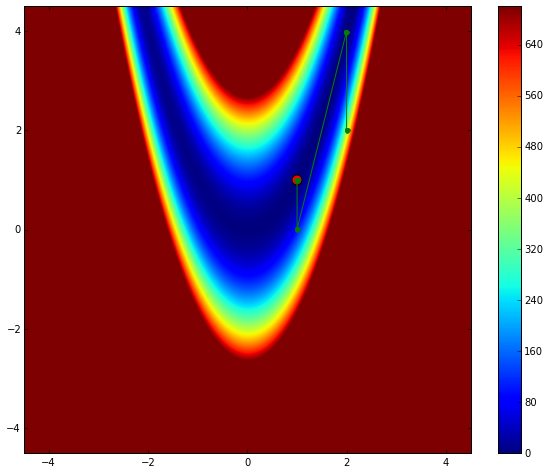

In [18]:
# Rosenbrock test with AlgoPy
a = 1.0
b = 100.0

# The Rosenbrock test function
def f(x):
    y = (- x[0] + a)**2 + b*(x[1] - x[0]**2)**2
    return y
xstar = (a, a**2) # minimum (red dot on the plot)
x0 = (2, 2) # starting coordinates


def plot_f():
    # Plot area
    ds = 0.01
    xmin, xmax = -4.5, 4.5
    ymin, ymax = -4.5, 4.5
    xx = np.arange(xmin, xmax+ds, ds)
    yy = np.arange(ymin, ymax+ds, ds)
    X, Y = np.meshgrid(xx, yy)
    Z = f([X, Y])

    fig, ax = plt.subplots()
    plt.axis([xmin, xmax, ymin, ymax])
    im = ax.imshow(Z, origin="lower", cmap=plt.cm.jet, vmax=700, extent=[xmin, xmax, ymin, ymax])
    plt.colorbar(im)
    im.set_interpolation('bilinear')

# The residual function for the Rosenbrock function.
# The gradient of f in this case.
# This was derived by hand
def R(x):
    y0 = -2*(- x[0]+a) - 4*b*x[0]*(x[1]-x[0]**2)
    y1 = 2*b*(x[1]-x[0]**2)
    return vstack([y0, y1])

# Automatically derived Jacobian of the residual function
def J_ad(x0):
    x = ValJac(x0, np.matrix([[1, 0], [0, 1]]))
    return R(x).jac

num_dimensions = 2
num_iterations = 20
p = np.zeros([num_dimensions, num_iterations])
p[:,0] = np.array(x0) # Starting coordinates


print("norm(Rk) during iterations\n------")
for k in range(0, num_iterations-1):
    pk = np.asmatrix(p[:,k]).T
    Rk = R(pk)
    Jk = J_ad(pk)
    p[:,k+1] = (pk - np.linalg.solve(Jk, Rk)).T
    print(np.linalg.norm(Rk))

print("-----Final values of x and R----")
print("pk = ", pk)
print("R(xk) = ", Rk)
plot_f()
plt.plot(p[0,:], p[1,:], 'g.-', mew=3)
print("Actual minimum is at", xstar)

# Draw the actual minimum of the test function
plt.scatter(xstar[0], xstar[1], c='red', s=100)

plt.show()

## Minimizing the Rosenbrock function in several dimensions

In [19]:
# The Rosenbrock test function in several dimensions, as found on Wikipedia.
def f(x):
    n = len(x)
    S = 0.0
    for i in range(0, n-1):
        S = 100 * (x[i+1] - x[i]**2)**2 + (x[i] - 1)**2 + S
    return S

x0 = (2, 2, 2, 4, 5, 9) # starting coordinates
n = len(x0)
xstar = (1,)*n


# The residual function for the Rosenbrock function.
# The gradient of f in this case.
# This was derived by hand.
def R(x):
    n = len(x)
    l = list()
    l.append(200*(x[1] - x[0]**2)*(-2*x[0]) +  2*(x[0]-1))
    for i in range(1, n-1):
        l.append(200*(x[i] - x[i-1]**2) + 200*(x[i+1]-x[i]**2)*(-2*x[i]) + 2*(x[i]-1))
    l.append(200*(x[n-1] - x[n-2]**2))

    return vstack(l)

# Automatically derived Jacobian of the residual function
def J_ad(x0):
    n = len(x0)
    x = ValJac(x0, np.asmatrix(np.eye(n)))
    return R(x).jac

num_dimensions = n
num_iterations = 20
pk = np.matrix(x0).T

np.set_printoptions(precision=4)
print("norm(Rk) during iterations\n------")
for k in range(0, num_iterations-1):
    Rk = R(pk)
    Jk = J_ad(pk)
    pk = (pk - np.linalg.solve(Jk, Rk))
    print("|R|:", np.linalg.norm(Rk), "pk:", pk.T)

print("Actual minimum is at", xstar)

norm(Rk) during iterations
------
|R|: 34826.6810362 pk: [[  1.5157   1.5798   1.7798   2.9861   5.0863  25.863 ]]
|R|: 4634.20154987 pk: [[  1.2521   1.3742   1.715    2.8956   8.2568  58.1222]]
|R|: 33248.2657732 pk: [[  1.1544   1.3086   1.6956   2.8726   8.2531  68.1129]]
|R|: 19.3267905426 pk: [[  1.0791   1.1576   1.3155   1.586    0.8619 -53.8855]]
|R|: 21512.9714107 pk: [[ 1.0324  1.0636  1.1206  1.1961  0.8657  0.7495]]
|R|: 283.528655347 pk: [[ 1.022   1.0444  1.0904  1.1869  1.4045  1.6824]]
|R|: 173.099045885 pk: [[ 1.0209  1.0423  1.0866  1.1812  1.396   1.9489]]
|R|: 1.01718643518 pk: [[ 1.0023  1.0042  1.0069  1.0077  0.9855  0.8027]]
|R|: 70.070531864 pk: [[ 0.9993  0.9986  0.9971  0.994   0.9873  0.9748]]
|R|: 0.27389763849 pk: [[ 1.      1.      0.9999  0.9999  0.9997  0.9992]]
|R|: 0.0630546130935 pk: [[ 1.  1.  1.  1.  1.  1.]]
|R|: 2.81041915696e-05 pk: [[ 1.  1.  1.  1.  1.  1.]]
|R|: 2.47573961472e-08 pk: [[ 1.  1.  1.  1.  1.  1.]]
|R|: 0.0 pk: [[ 1.  1.  1.  1.